# Artificial Intelligence: Face Detection Using Face API of Microsoft Cognitive Service.

This script contain image detection technique using Face API of the Microsoft Cognitive Service. The Face API is used to detect if face present in an image corresponded with the predefined image. 

## To fix Face Detection API

In [2]:
#face detection api keys obtained from Microsoft Cognitive Services
faceURI = "https://westcentralus.api.cognitive.microsoft.com/face/v1.0"
faceKey = "f44e373cacab4f579f600cf7d233823d"

In [ ]:
!pip install cognitive_face
!pip install pillow

The above code install the cognitive_face package using PIP Install Package(PIP).
The package makes it easy for the Face API to detect face in an image.

In [4]:
import cognitive_face as CF

#Set URI and key
CF.BaseUrl.set(faceURI)
CF.Key.set(faceKey)

#Detect faces in an image
img_url = 'https://raw.githubusercontent.com/classicalmuheeb/ImageForComputerVision/master/IMG_20181019_114627.jpg'
result = CF.face.detect(img_url)
print(result)

[{'faceId': 'fea7ae01-376b-4cba-acde-00fe5f3b4fcd', 'faceRectangle': {'top': 1135, 'left': 1527, 'width': 547, 'height': 547}}]


The Face API has detected one face and assigned it an 'faceid'. 
It now knows the face properties such as the top, width, heigth.

Initial image - without face
After face detection


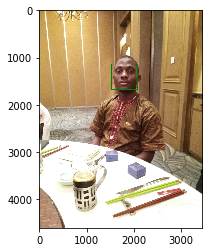

In [19]:
%matplotlib inline
import requests
from io import BytesIO
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

#Get the image
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
print('Initial image - without face')
imshow(img)

#Add rectangles for each face found
color = "green"
if result is not None:
    draw = ImageDraw.Draw(img) 
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        left = faceRectangle['left']
        top = faceRectangle['top']
        width = faceRectangle['width']
        height = faceRectangle['height']
        draw.line([(left,top),(left+width,top)],fill=color, width=5)
        draw.line([(left+width,top),(left+width,top+height)],fill=color , width=5)
        draw.line([(left+width,top+height),(left, top+height)],fill=color , width=5)
        draw.line([(left,top+height),(left, top)],fill=color , width=5)

#show the image with the rectangle
print("After face detection")
imshow(img)

The Face API can also be used to compare detected faces and check if they matches.

In [14]:
face1 = result[0]['faceId']
print ('The id of Face 1 is: ', face1)

The id of Face 1 is:  fea7ae01-376b-4cba-acde-00fe5f3b4fcd


Second Image
The id of Face 2 is:  a0bda8f0-9614-4fcd-ac37-ec06b1379702
Not Verified
Confidence Level:  0.37648


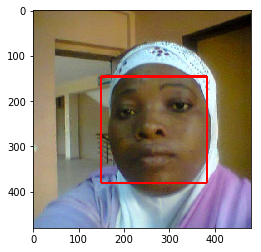

In [23]:
#image 2: to compare with the first image
img2_url = "https://raw.githubusercontent.com/classicalmuheeb/ImageForComputerVision/master/Passport%20Photograph.jpg"
#img2_url = "https://raw.githubusercontent.com/classicalmuheeb/ImageForComputerVision/master/IMG_20181019_114627.jpg"
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))
print('Second Image')

#Detect face of the second image
result2 = CF.face.detect(img2_url)

#Assume the first face is the one we want to compare
if result2 is not None:
    face2 = result2[0]['faceId']
    print("The id of Face 2 is: ", face2)

#method to verify the faces

def verify_face(face1, face2):
    #By default, we assume the match is unverified
    verified = "Not Verified"
    color = "red"
    
    #compare the comparison face to the origine one we retrieved previously
    verify = CF.face.verify(face1, face2)
    
    #If there's a match, set verified and change to green
    if verify['isIdentical'] == True:
        verified = "Verified"
        color = "green"
    
    #Display the second face with a red rectangle if unverified or green if verified
    draw = ImageDraw.Draw(img2) 
    for currFace in result2:
        faceRectangle = currFace['faceRectangle']
        left = faceRectangle['left']
        top = faceRectangle['top']
        width = faceRectangle['width']
        height = faceRectangle['height']
        draw.line([(left,top),(left+width,top)] , fill=color, width=5)
        draw.line([(left+width,top),(left+width,top+height)] , fill=color, width=5)
        draw.line([(left+width,top+height),(left, top+height)] , fill=color, width=5)
        draw.line([(left,top+height),(left, top)] , fill=color, width=5)

    #show the image    
    imshow(img2)
    
    #print verification status and confidence level
    print(verified)
    print("Confidence Level: ", str(verify['confidence']))
    
verify_face(face1, face2)